**Missing Data**
> Missing data refers to the absence of information for a specific observation or variable in a dataset. This lack of data may result from errors in the data collection process or an inability to measure certain observations or variables. Missing data can pose significant problems in data analysis and modeling, as it can lead to misleading analysis results and affect model performance.

**NULL - NaN - NA**
> Missing data analysis involves understanding the reasons for missing data and using techniques to deal with it. These techniques include filling in missing data, performing analyses that account for missing data, and improving the data collection process to reduce missingness.

**Missing Data Mechanisms**
> The concept of missing data mechanisms explains how missing data occurs and why certain data points are missing. It helps determine whether missing data is random or systematic.
>
> > **1. Missing Completely at Random** (MCAR) <br>
> > **2. Missing at Random** (MAR) <br>
> > **3. Missing Not at Random** (MNAR) <br>
>
> During the data analysis process, it's essential to investigate whether the missing data is random or non-random, and each situation requires an appropriate solution.
> 
> > **1. Step:** Detect missing data <br>
> > **2. Step:** Test for randomness of missing data <br>
> > **3. Step:** Develop a solution

**Detecting Missing Observations**
> `df.info()` &emsp; `df.isna()` &emsp; `df.isna().sum()` &emsp; `df[df.isna().any(axis=1)]`

**Random Missing Data**
> **1. Can be ignored.** It is recommended that the missing data rate should not exceed 5%. <br>
> **2. Rows can be deleted.** <br>
> **3. The value can be filled.** It is usually filled with the mean or median. However, if the data set can be categorized, it would be more efficient to fill it with the mean or median of the group it belongs to. <br>
> **4. It can be imputed using regression models.** <br>
> **5. Machine learning models can be used for imputation.** <br>
> **6. Can be filled with time series.** The time series is seasonally and calendar adjusted. <br>
> **7. Can be filled according to trend structure.** Can be filled according to the appropriate model such as linear, parabolic. <br>
> **8. Bayesian analysis can be used for imputation.**

**Non-Random Missing Data**
> Advanced techniques (methods 4-8) should be used to impute non-random missing data. Deleting data should be avoided.

**Testing for Missingness Randomness**
> 
> **1. Method** <br>
> > Data is divided into two groups: those with missing values and those without. A t-test is used to see if the means of the two groups differ.
>
> **2. Method*** <br>
> > Data is divided into two groups: those with and without missing values. The missing data is coded as 1, and the observed data as 0. A Pearson correlation test is then conducted to calculate the correlation coefficient for each variable. If the coefficient is below 0.8 (according to general consensus), the missingness is assumed to be random.
>
> **3. Method** <br>
> > The Chi-square test is a commonly used method to investigate the randomness of missingness in the MCAR mechanism. If the null hypothesis ($H_0$) is rejected ($p < 0.05$), it can be concluded that the missing data is not part of the MCAR mechanism (Little, 1998). \[Little's MCAR test].
>
> | | |
> |-|-|
> | $H_0$ | Missing data is random. |
> | $H_1$ | Missing data is not random. |

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [1]:
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Detecting Missing Values </p>

In [2]:
data = pd.read_excel('data/missing_values.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      28 non-null     float64
 1   C2      29 non-null     float64
 2   C3      25 non-null     float64
 3   C4      21 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [3]:
# data.isna()
data.isna().sum()

C1     5
C2     4
C3     8
C4    12
dtype: int64

In [4]:
data[data.isna().any(axis=1)]

,C1,C2,C3,C4
8,23.0,NaN,NaN,NaN
9,77.0,NaN,NaN,NaN
10,29.0,NaN,NaN,NaN
13,76.0,54.0,75.0,NaN
14,47.0,49.0,48.0,NaN
15,17.0,79.0,67.0,NaN
16,79.0,40.0,29.0,NaN
24,NaN,80.0,NaN,NaN
25,NaN,41.0,NaN,NaN
26,NaN,27.0,NaN,NaN


In [5]:
data.any()

C1    True
C2    True
C3    True
C4    True
dtype: bool

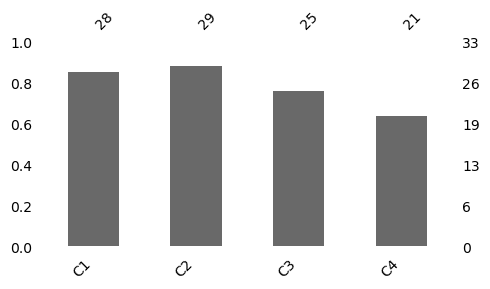

In [6]:
ms.bar(data, figsize=(5,3), fontsize=10)
plt.tight_layout()
plt.show()

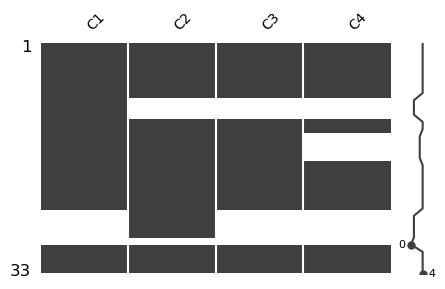

In [7]:
ms.matrix(data, figsize=(5,3), fontsize=10)
plt.show()

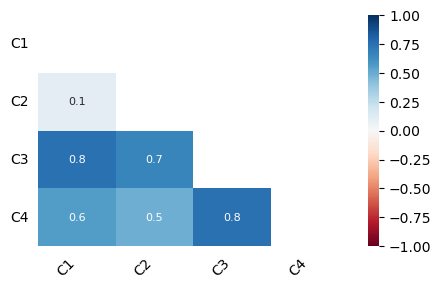

In [8]:
ms.heatmap(data, figsize=(5,3), fontsize=10)
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Test for Randomness of Missing Value - Correlation </p>

In [9]:
# data[~data.isna()] = 1    # notna()
# data[data.isna()] = 0
df = data.notna().astype('int')

In [10]:
display(df.corr().round(2))

,C1,C2,C3,C4
C1,1.00,0.10,0.75,0.56
C2,0.10,1.00,0.66,0.49
C3,0.75,0.66,1.00,0.75
C4,0.56,0.49,0.75,1.00


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Deletion of Rows with Missing Data - Listwise Deletion </p>

In [11]:
df = data.copy()

print(df.isna().sum())

# df.dropna(inplace=True)

# df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)

# df.dropna(ignore_index=True, inplace=True)

# df.dropna(how='all', ignore_index=True, inplace=True)

# df.dropna(axis=1, ignore_index=True, inplace=True)

# df.dropna(axis=1, how='all', ignore_index=True, inplace=True)

# df.dropna(axis=1, thresh=22, ignore_index=True, inplace=True)

# df.dropna(thresh=2, ignore_index=True, inplace=True)


# display(df)

C1     5
C2     4
C3     8
C4    12
dtype: int64


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Imputation of Missing Data </p>

In [12]:
df = data.copy()

# df.fillna(value=0, inplace=True)

# df.fillna(value='missing', inplace=True)

# df.fillna({'D1': df['D1'].mean()}, inplace=True)

# df.fillna(value=df.mean()['D1':'D2'], inplace=True)

# df.fillna(value=df.mean()[:], inplace=True)


# display(df)

In [13]:
df = data.copy()

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['C1', 'C2']])
df[['C1', 'C2']] = imputer.transform(df[['C1', 'C2']])

# display(df)

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp;</p>

In [14]:
data = pd.read_excel('data/missing_values_categoric.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  40 non-null     object 
 1   Age     32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [15]:
df = data.copy()

# # display(df.groupby('Gender')['Age'].mean().to_frame())
# df.fillna({'Age': df.groupby('Gender')['Age'].transform('mean')}, inplace=True)
# display(df)

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp;</p>

In [16]:
options = ['First', 'Second', 'Third', 'Fourth']
first = np.random.choice(options, size=55, replace=True)
second = np.array([None] * 6)

data = np.concatenate([first, second])
np.random.shuffle(data)

data = pd.DataFrame(data, columns=['Options'])
indexes = data[data['Options'].isna()].index

In [17]:
df = data.copy()
mode = df['Options'].mode()[0]
print(mode)
df.fillna({'Options': df['Options'].mode()[0]}, inplace=True)
display(df.loc[indexes])

Third


,Options
1,Third
17,Third
22,Third
41,Third
44,Third
52,Third


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>